In [1]:
from glob import glob

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("darkgrid")

In [2]:
print(f"Pandas Version: {pd.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"Seaborn Version: {sns.__version__}")

Pandas Version: 1.2.1
Matplotlib Version: 3.4.2
Seaborn Version: 0.11.1


In [3]:
SENSITIVITY_ANALYSIS = "sensitivity-analysis-202106191741"
output_files = glob(f"reports/{SENSITIVITY_ANALYSIS}/model-*/out.csv")

model_param = pd.read_csv(f"reports/{SENSITIVITY_ANALYSIS}.csv")
model_param.reset_index(inplace=True)
model_param["index"] = model_param["index"] + 1
model_param.rename(columns={"index": "model"}, inplace=True)

df = None
for file in output_files:
    tmp_df = pd.read_csv(file)
    # Get the model run number
    tmp_df["model"] = file.split("\\")[1].split('-')[1] 
    if df is None:
        df = tmp_df
    else:
        df = pd.concat([df, tmp_df])
df["model"] = df["model"].astype("int64")

df = df.merge(model_param, on="model", how="inner")
df.rename(columns={"plant_counts_1": "test_plant_count", "plant_counts_2": "control_plant_count"}, inplace=True)
df["test_plant_pct"] = df["test_plant_count"]/(df["control_plant_count"] + df["test_plant_count"]) * 100
print(df.head())
print(len(df))

   year  test_plant_count  control_plant_count  model  rii_diff  seed_diff  \
0     1                68                   68      1       0.0          0   
1     2                88                   98      1       0.0          0   
2     3               110                  116      1       0.0          0   
3     4               117                  127      1       0.0          0   
4     5               131                  149      1       0.0          0   

   spread_diff  rep_cyc  test_plant_pct  
0          0.0        1       50.000000  
1          0.0        1       47.311828  
2          0.0        1       48.672566  
3          0.0        1       47.950820  
4          0.0        1       46.785714  
330


In [4]:
tests = {
    "rii_diff": {
        "name": "RII Difference",
        "models": [x for x in range(1, 10)],
    },
    "seed_diff": {
        "name": "Seed Difference",
        "models": [x for x in range(10, 14)]
    },
    "spread_diff": {
        "name": "Seed Spread Difference",
        "models": [x for x in range(14, 21)]
    },
    "rep_cyc": {
        "name": "Reproduction Cycles",
        "models": [x for x in range(21, 23)]
    }
}

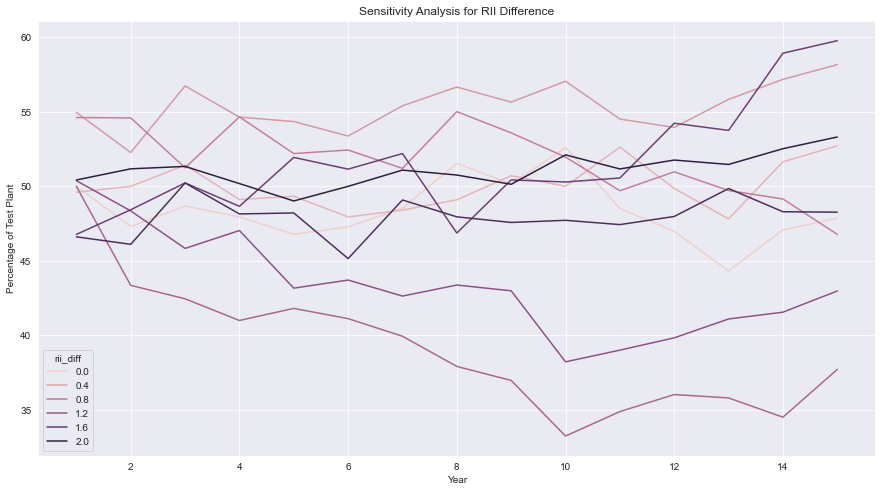

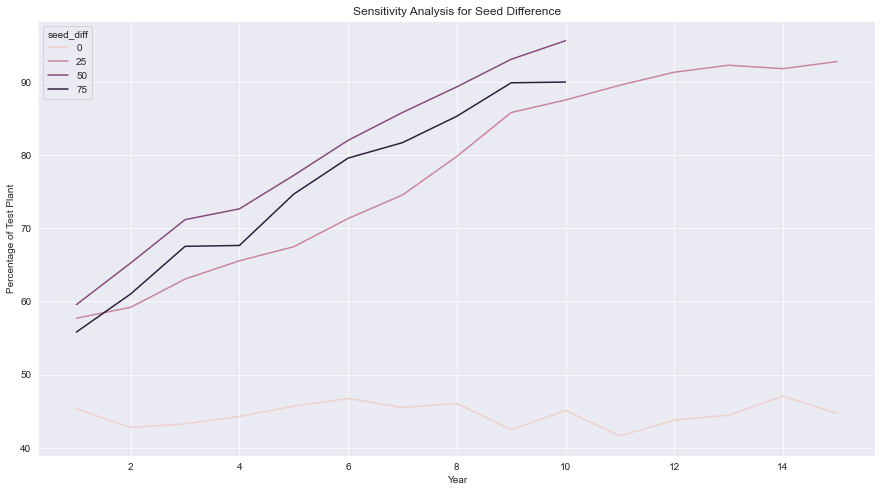

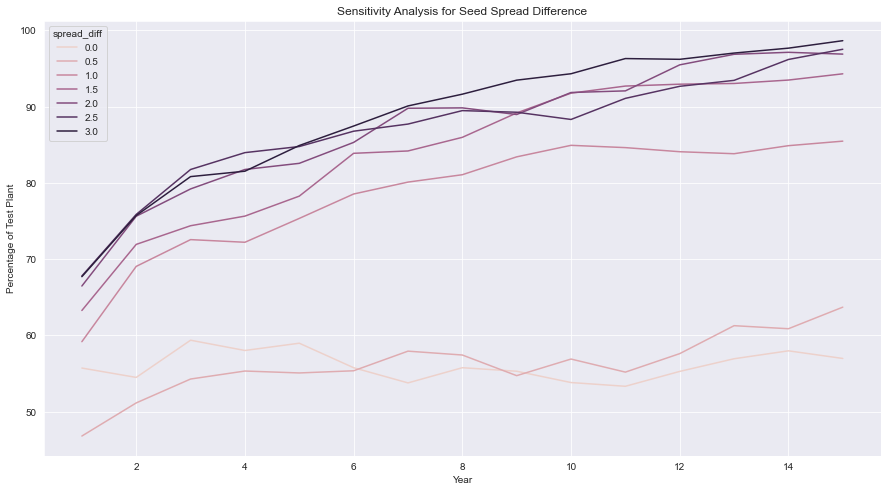

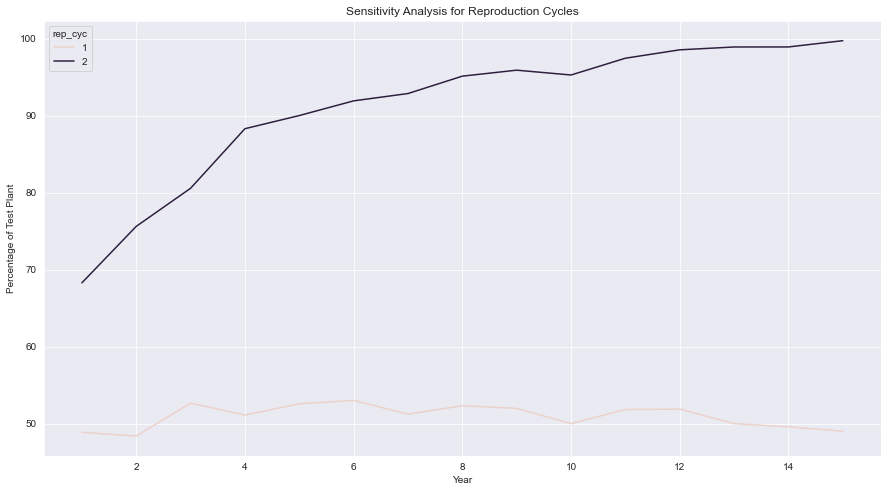

In [37]:
for t in tests:
    test_df = df[df["model"].isin(tests[t]["models"])]
    plt.figure(figsize=(15, 8))
    fig = sns.lineplot(x="year", y="test_plant_pct", hue=t, data=test_df)
    fig.set(
        title=f"Sensitivity Analysis for {tests[t]['name']}",
        xlabel="Year",
        ylabel="Percentage of Test Plant"
    )
    
    fig = fig.get_figure()
    fig.savefig(f"reports/{SENSITIVITY_ANALYSIS}/graphs/test-{t}.png")
    plt.show()

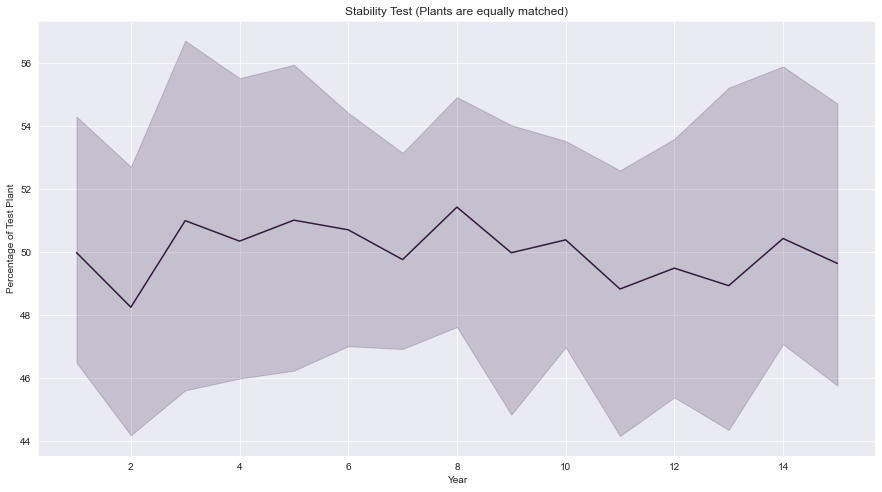

In [39]:
repr_test = df[df["model"].isin([1,10,14,21])]
plt.figure(figsize=(15,8))
fig = sns.lineplot(x="year", y="test_plant_pct", color=sns.color_palette("rocket")[0], data=repr_test)
fig.set(
    title="Stability Test (Plants are equally matched)",
    xlabel="Year",
    ylabel="Percentage of Test Plant",
)
fig = fig.get_figure()
fig.savefig(f"reports/{SENSITIVITY_ANALYSIS}/graphs/test-stability.png")